Goal - define transects and boxes for looking at transport loss/balance on NL Shelf

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import transport

In [2]:
lon_min=-70
lat_min=40
lon_max=-40
lat_max=70

In [3]:
# Load sample currents 
d = xr.open_mfdataset('~/data/cmems2020-oceanstatereport/data/netcdf/GLORYSv12/monthly-means/*JJA.nc')
d = d.sel(latitude=slice(lat_min, lat_max), longitude = slice(lon_min, lon_max))
d = d.mean(dim='time')
mask = xr.open_dataset('/ocean/handres/glorys12/statics_subset_mask_bathy.nc')
mask = mask.sel(latitude=slice(lat_min, lat_max), longitude = slice(lon_min, lon_max))
coords = xr.open_dataset('/ocean/handres/glorys12/statics_subset_coordinates.nc')
coords = coords.sel(latitude=slice(lat_min, lat_max), longitude = slice(lon_min, lon_max))

H = (mask.mask*coords.e3t).sum(dim='depth')
H = H.where(H!=0)
ubar = transport.depth_integrate(d.uo, mask.mask, coords.e3t)/H
vbar = transport.depth_integrate(d.vo, mask.mask, coords.e3t)/H

In [4]:
speed = np.sqrt(ubar**2 + vbar**2)

Text(0.5, 1.0, 'GLORYS12 depth-averaged currents- JJA average 1993-2019')

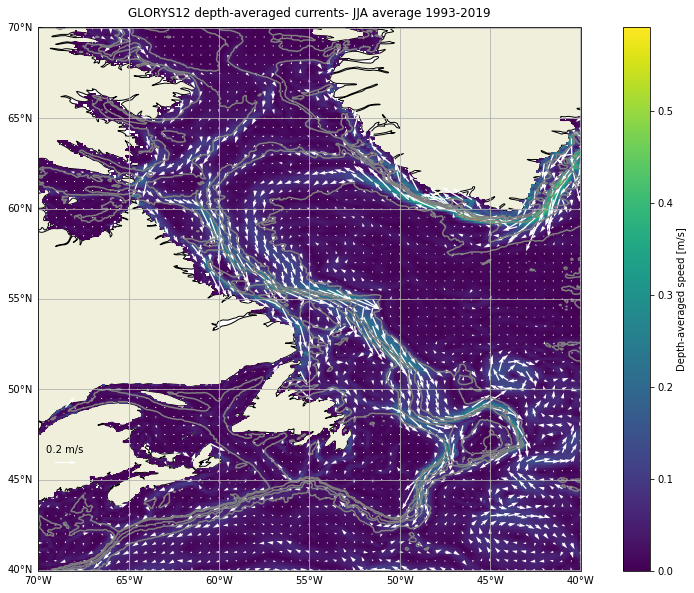

In [5]:
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

mesh = ax.pcolormesh(speed.longitude, speed.latitude, speed.values, transform=ccrs.PlateCarree())
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('Depth-averaged speed [m/s]')

c = ax.contour(H.longitude, H.latitude, H.values, levels=[200, 500,1500, 2000, 3000],colors=['grey'])
step=6
q = ax.quiver(speed.longitude[::step], speed.latitude[::step], ubar.values[::step,::step], vbar.values[::step,::step], 
              scale=5,
              color='white',
              transform=ccrs.PlateCarree())
ax.quiverkey(q,0.05,0.2,0.2,'0.2 m/s',color='white')
ax.add_feature(cfeature.LAND, edgecolor='black')
g = ax.gridlines(draw_labels=True)
g.top_labels = False
g.right_labels = False
ax.set_title('GLORYS12 depth-averaged currents- JJA average 1993-2019')

In [6]:
import pandas as pd
import io

In [7]:
# Ocean Navigator and Nicolas Lambert's sections_info.txt

transects = \
"""
Longname,Shortname,lon1,lat1,lon2,lat2,Dir-E,Dir-N
BeachyIsland,Be,-61.5628,57.0502,-58.5019,57.9520,1,-1
MakkovikBank,MB,-59.1931,54.9811,-56.3296,56.1534,1,-1
SealIsland,SI,-55.917366,53.146169,-52.007608,54.392137,1,-1
WhiteBay,WB,-56.5764,50.1878,-49.6646,52.1379,1,-1
Bonavista,BV,-53.070000,48.630000,-49,50,1,-1
FlemishCap,FC,-52.930000,47,-43,47,-1,-1
BelleIsle,BI,-56.254701,51.907072,-56.119010,51.371217,-1,-1
"""

In [9]:
d = pd.read_csv(io.StringIO(transects), sep=",")
d.to_csv('NL-transects.csv')

In [10]:
d

,Longname,Shortname,lon1,lat1,lon2,lat2,Dir-E,Dir-N
0,BeachyIsland,Be,-61.562800,57.050200,-58.501900,57.952000,1,-1
1,MakkovikBank,MB,-59.193100,54.981100,-56.329600,56.153400,1,-1
2,SealIsland,SI,-55.917366,53.146169,-52.007608,54.392137,1,-1
3,WhiteBay,WB,-56.576400,50.187800,-49.664600,52.137900,1,-1
4,Bonavista,BV,-53.070000,48.630000,-49.000000,50.000000,1,-1
5,FlemishCap,FC,-52.930000,47.000000,-43.000000,47.000000,-1,-1
6,BelleIsle,BI,-56.254701,51.907072,-56.119010,51.371217,-1,-1


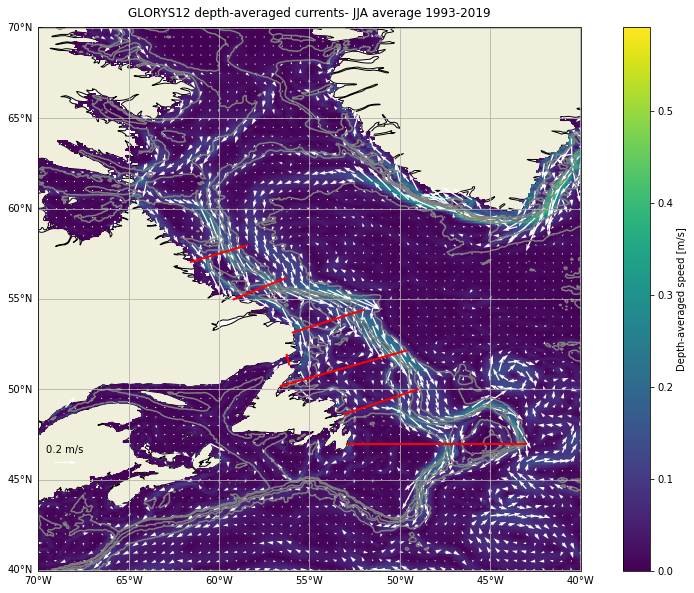

In [11]:
for index, row in d.iterrows():
    ax.plot([row['lon1'], row['lon2']], [row['lat1'], row['lat2']], transform=ccrs.PlateCarree(),
            color='red',lw=2)
fig

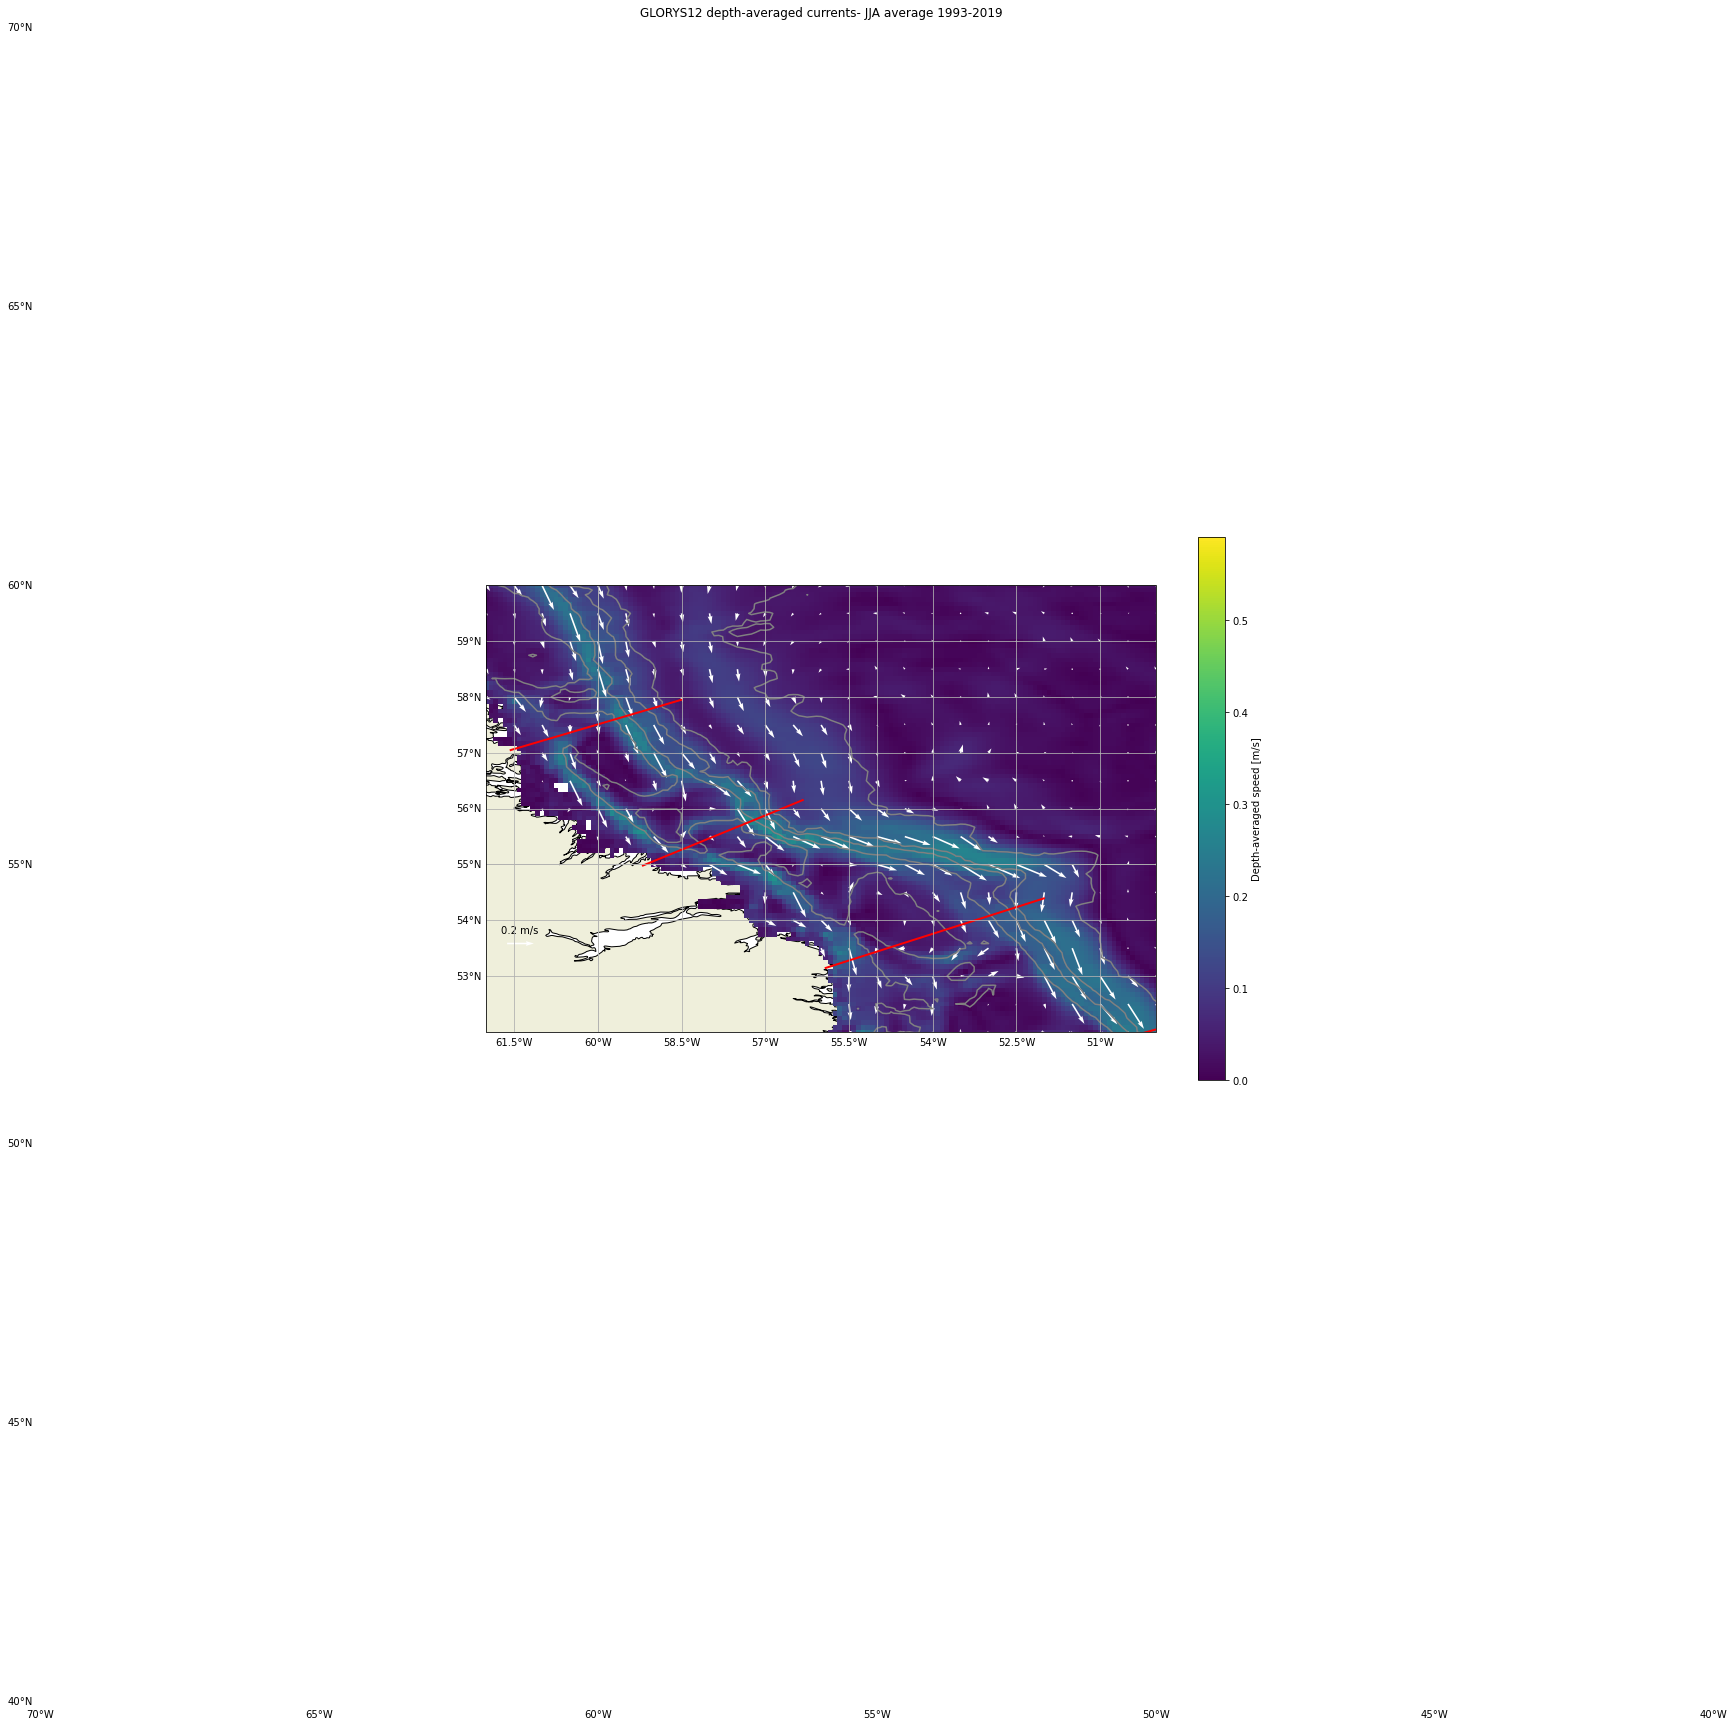

In [12]:
ax.set_extent([-62,-50,52,60])
g = ax.gridlines(draw_labels=True)
g.top_labels = False
g.right_labels = False
fig